# Census Income Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
CI_data = pd.read_csv('D:\data project\Census_Income.csv')
CI_data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
CI_data.shape

(32560, 15)

In [5]:
CI_data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
CI_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
CI_data.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

Label column has only two categories, hence it is a problem of classification. There are no constant columns nor there are any identifier column.

In [8]:
CI_data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values in the dataset

In [9]:
CI_data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

There are 8 object type feautures rest of the features are of integer type.

In [10]:
CI_data.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

There is skewness present in the data which needs to be removed.

In [11]:
CI_data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

Datasets is imbalanced 

In [12]:
CI_data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


All the columns are not present as they are of object type. Count of each column is 32560 showing there are no null values. Mean is very much greater than the median in capital gain and capital loss stating that there is high skewness present and data is skewed to the right side. Also there is high variance in Capital gain and Capital loss column. Min, Max, and interquartile ranges have variable difference, that means there are outliers present in the data.

In [13]:
#describe function for non numeric variables.
q=CI_data[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']]
q.describe()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
count,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27815,21789,29169


 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

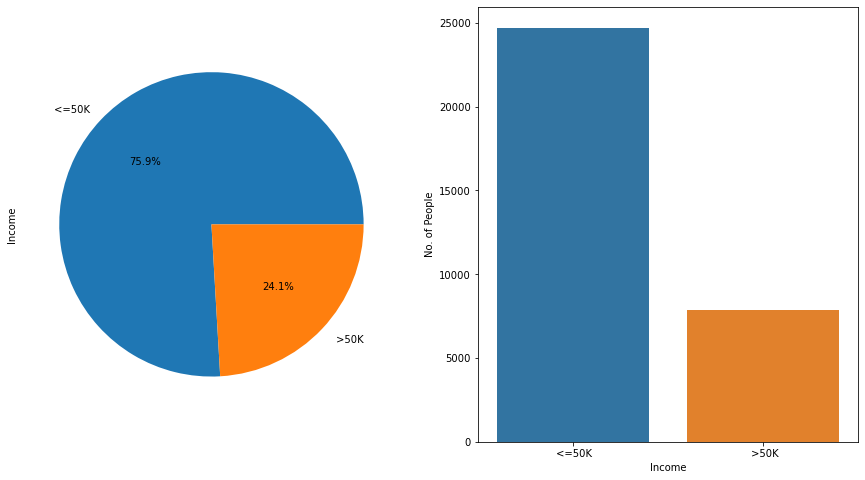

In [14]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
CI_data['Income'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x='Income',data=CI_data)
plt.ylabel('No. of People')
CI_data['Income'].value_counts()

Dataset if highly imbalanced. There is less than 25% of >50K income category while more than 75% of <=50K income.

In [15]:
#Separating categorical and continuous variables
cat=[feature for feature in CI_data.columns if CI_data[feature].nunique()<45]
cont=[feature for feature in CI_data.columns if CI_data[feature].nunique()>45]

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

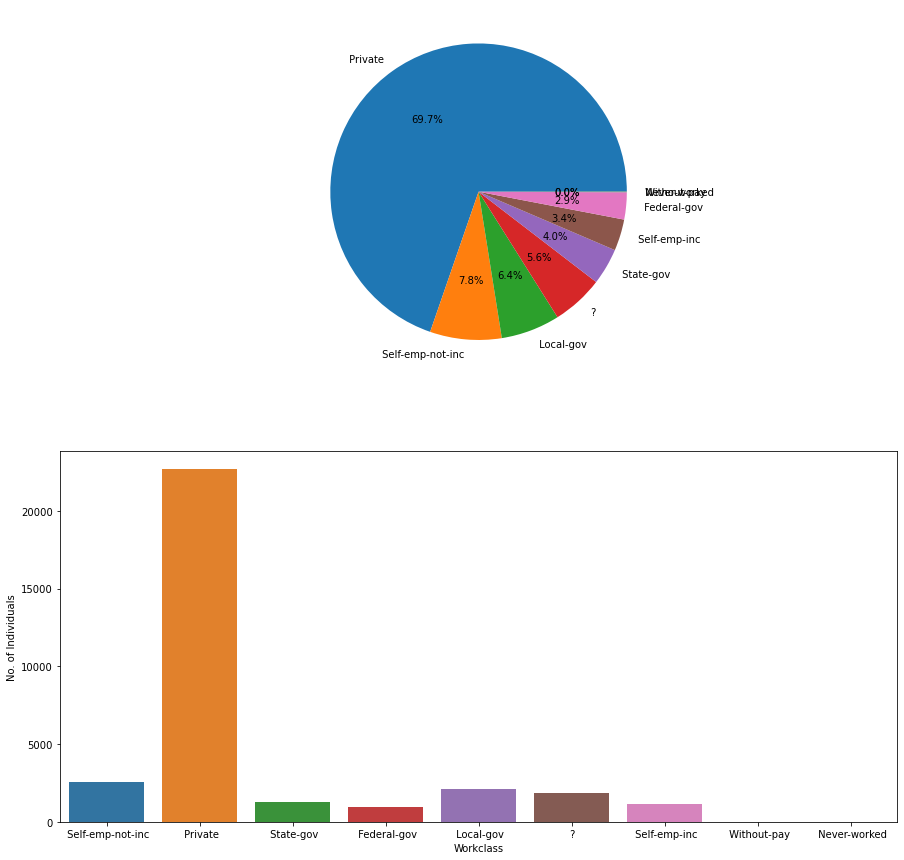

In [16]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
CI_data['Workclass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(x='Workclass',data=CI_data)
plt.ylabel('No. of Individuals')
CI_data['Workclass'].value_counts()

There are 9 workclass in total including Never worked and one unknown category(?).Most individuals work in private sector and there are very few who have never worked or work without pay. There are 3 categories of govt job provided state, federal and local among which no. of people working in the local govt is highest.

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

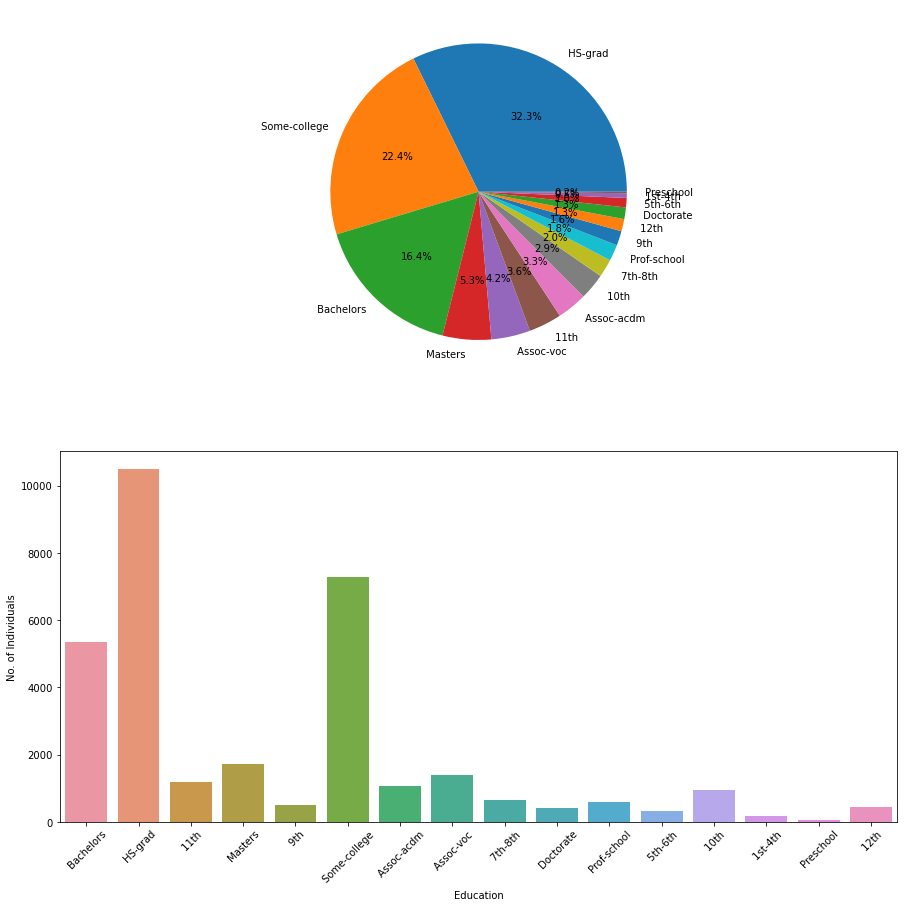

In [17]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
CI_data['Education'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(x='Education',data=CI_data)
plt.xticks(rotation=45)
plt.ylabel('No. of Individuals')
CI_data['Education'].value_counts()

Most of the people are high school graduate. There are few who have done masters and doctorate. The no. of people who went through just the preschool or 1st to 4th is the least.

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

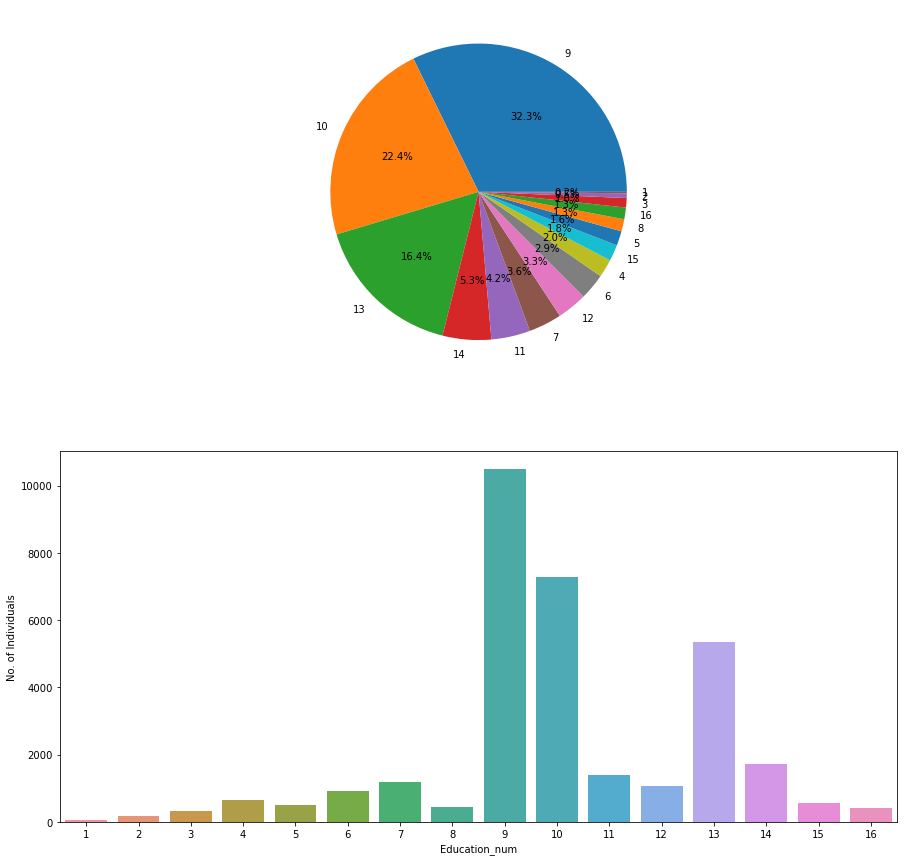

In [18]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
CI_data['Education_num'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(x='Education_num',data=CI_data)
plt.ylabel('No. of Individuals')
CI_data['Education_num'].value_counts()

Majority of individuals lie in the 9th 10th category of education no. which is a liitle higher than the median education number. People with least and highest educations are very few.

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

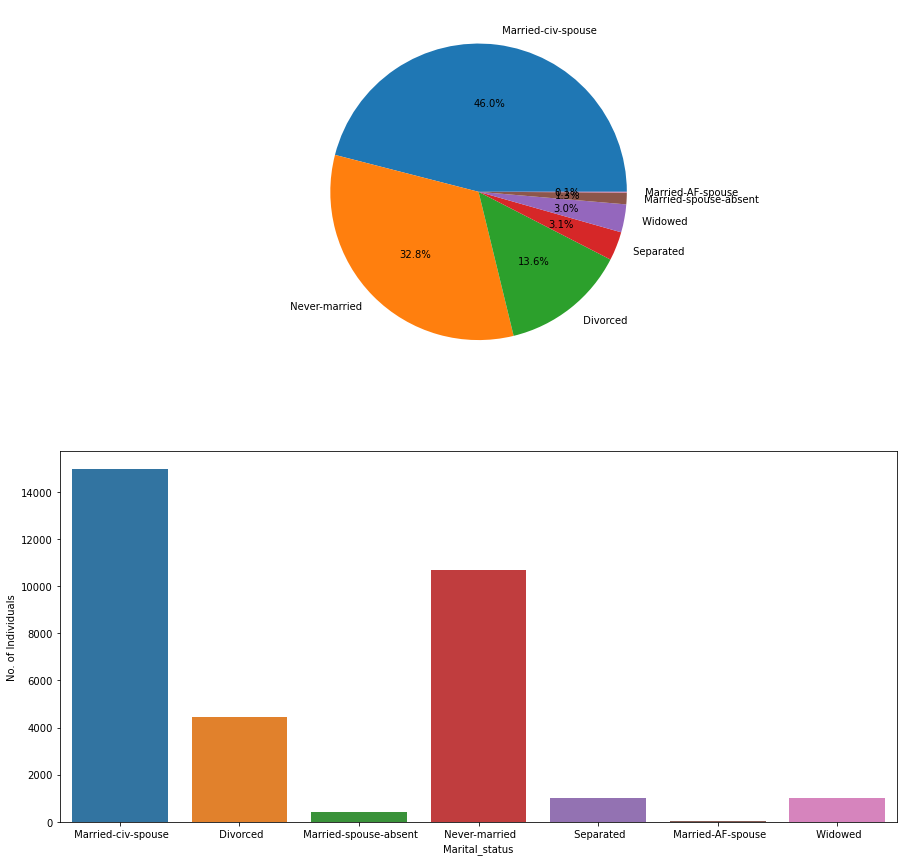

In [19]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
CI_data['Marital_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(x='Marital_status',data=CI_data)
plt.ylabel('No. of Individuals')
CI_data['Marital_status'].value_counts()

Majority of people are married to a civialian spouse or Never married. Least people are married to armed forces. From the above maritial status data we can see that there are less young people in the workforce as compared to young ones.

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

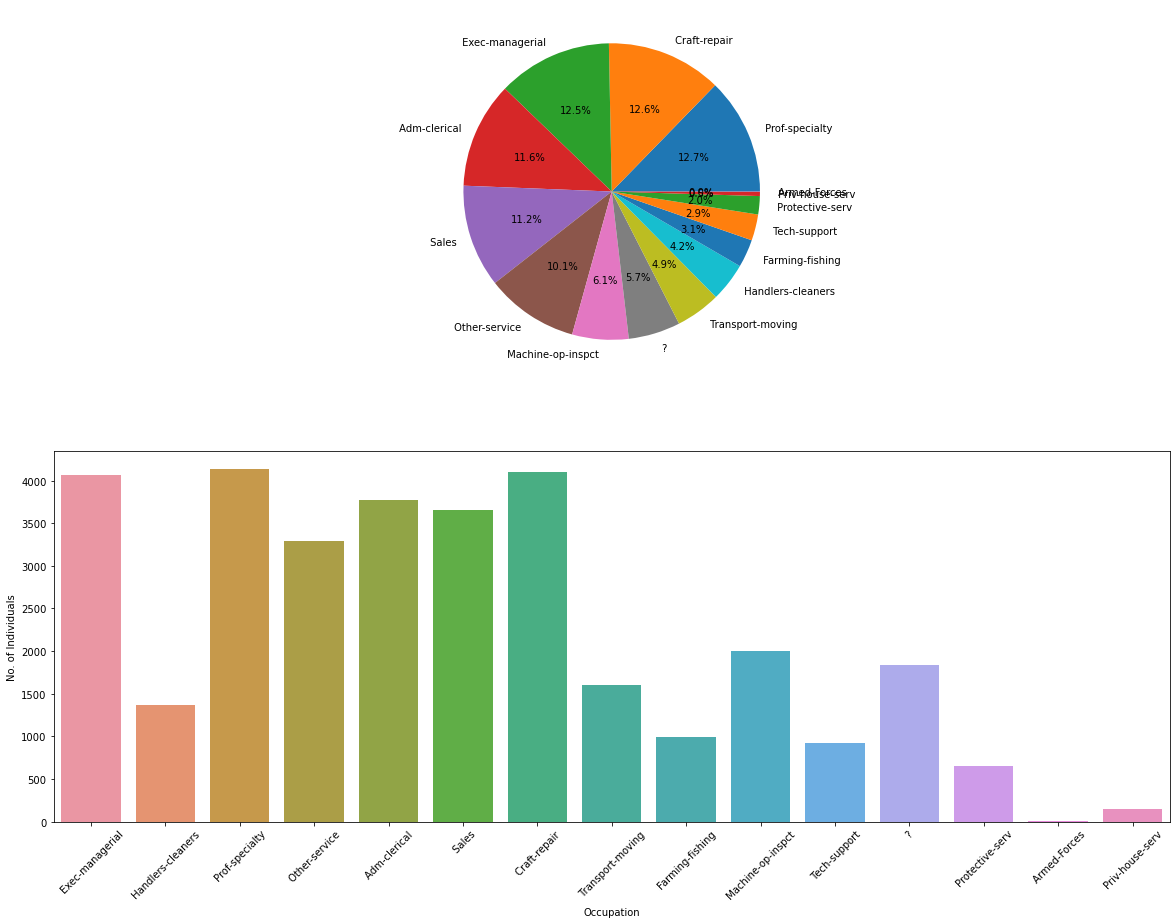

In [20]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
CI_data['Occupation'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(x='Occupation',data=CI_data)
plt.xticks(rotation=45)
plt.ylabel('No. of Individuals')
CI_data['Occupation'].value_counts()

We can observe over here that prof-speciality has the highest number for people than any other occupation. followed by craft repair persons. Minimum occupation category is the armed forces with only 9 people in it. There is an unknown category of occupation too.

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

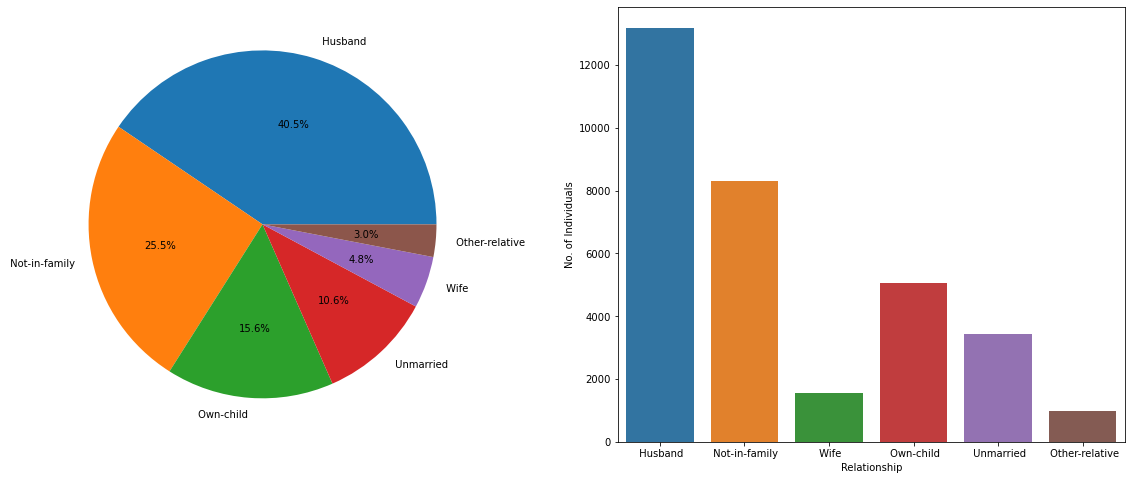

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
CI_data['Relationship'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(1,2,2)
sns.countplot(x='Relationship',data=CI_data)
plt.ylabel('No. of Individuals')
CI_data['Relationship'].value_counts()

There are much more husband working than their wives. There are 25% individuals working who fall in not in family category.

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

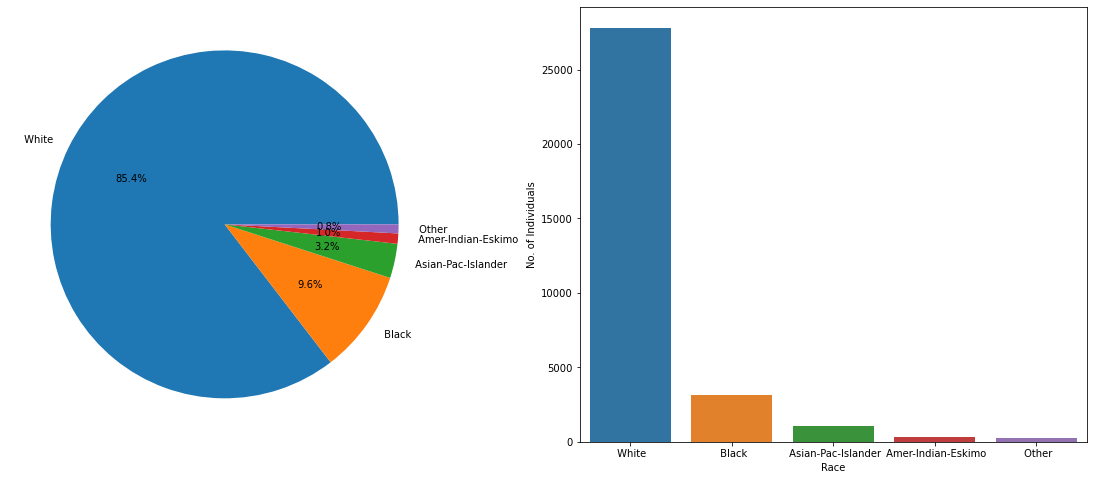

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
CI_data['Race'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(1,2,2)
sns.countplot(x='Race',data=CI_data)
plt.ylabel('No. of Individuals')
CI_data['Race'].value_counts()

SInce this is from european countries, most of the individuals working here are white. There is also an other category where minory races are present.

 Male      21789
 Female    10771
Name: Sex, dtype: int64

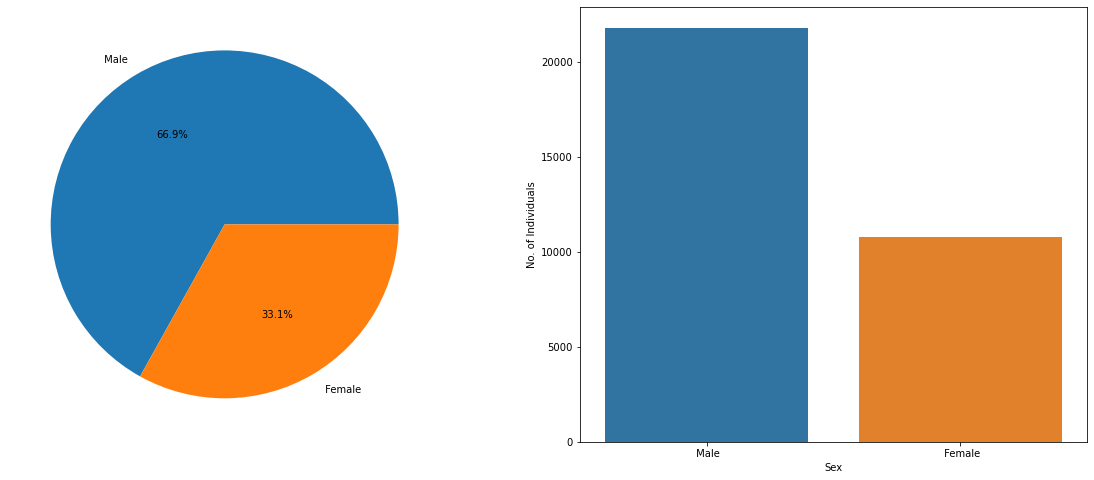

In [23]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
CI_data['Sex'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(1,2,2)
sns.countplot(x='Sex',data=CI_data)
plt.ylabel('No. of Individuals')
CI_data['Sex'].value_counts()

There is more than double the number of men working than the no. of women.

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

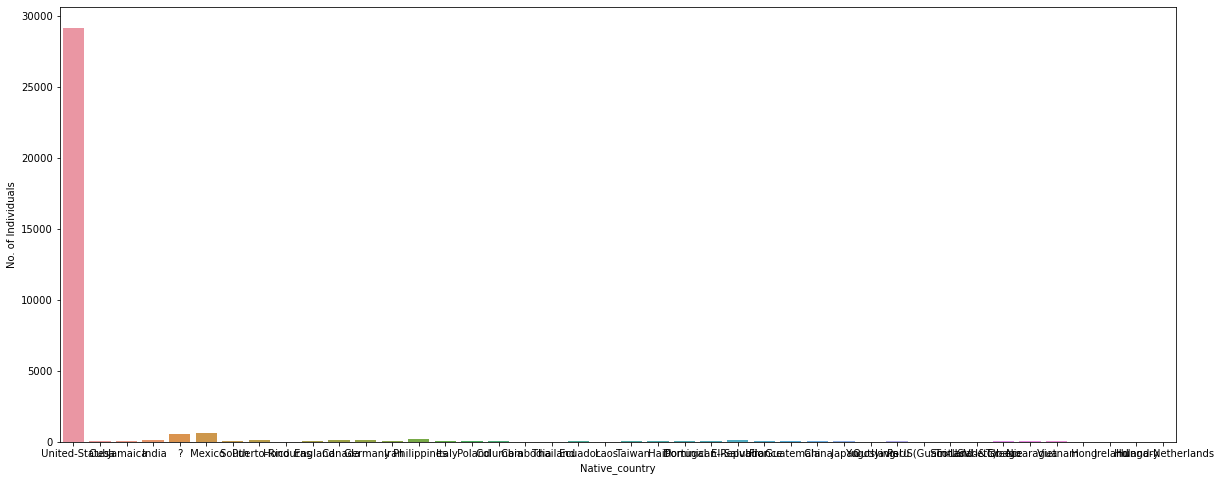

In [24]:
plt.figure(figsize=(20,8))
sns.countplot(x='Native_country',data=CI_data)
plt.ylabel('No. of Individuals')
CI_data['Native_country'].value_counts()

Majority of the people working belong from U.S. whereas there are people who come to U.S. from their own countries but there no. is very low. Second highest no. of people belong from Mexico as it is a neighboring country.

Minimum 17
Maximum 90


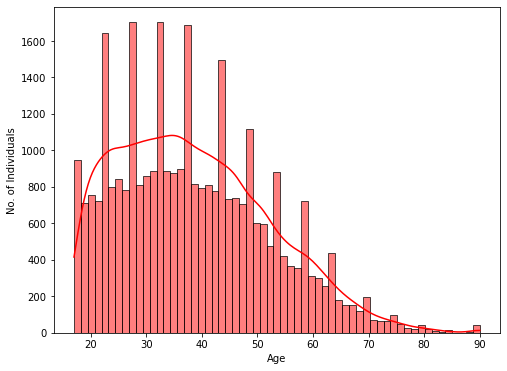

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(CI_data['Age'],kde=True,color='r')
plt.ylabel('No. of Individuals')
print('Minimum',CI_data['Age'].min())
print('Maximum',CI_data['Age'].max())

Minimum age of a working individual is 17 and highest is 90 which is way far retirement, but majority of the people working are in the age 25 to 45. Data is skewed to the right side.

Minimum 12285
Maximum 1484705


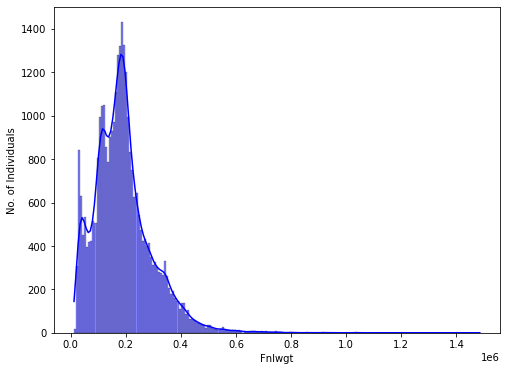

In [26]:
plt.figure(figsize=(8,6))
sns.histplot(CI_data['Fnlwgt'],kde=True,color='b')
plt.ylabel('No. of Individuals')
print('Minimum',CI_data['Fnlwgt'].min())
print('Maximum',CI_data['Fnlwgt'].max())

It is assigned by combination of features and has the peak wt as 0.2*1e6. Data does not follow normal distribution and data is rigt skewed.

Minimum 0
Maximum 99999


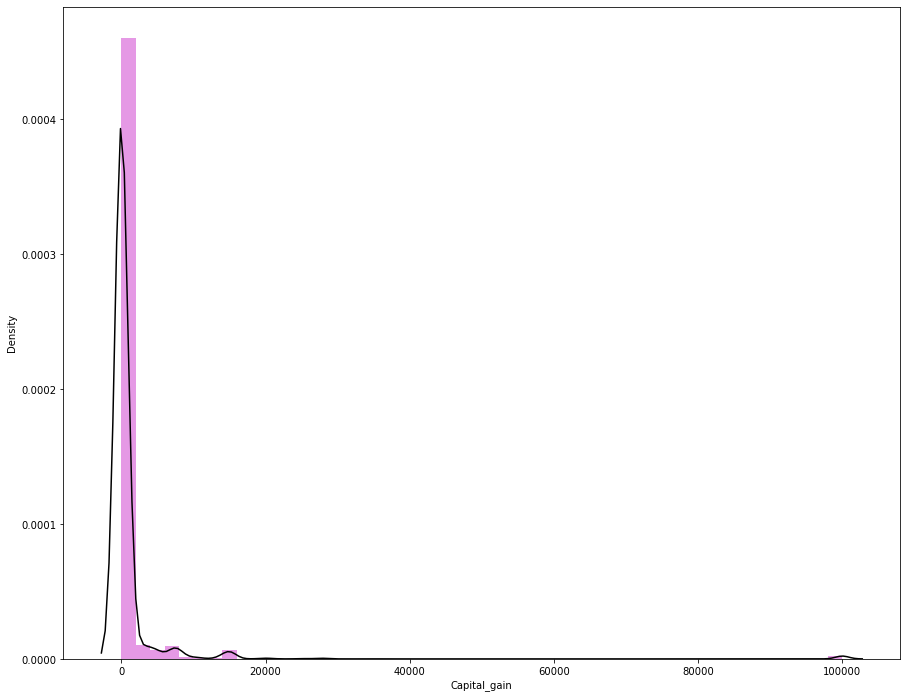

In [27]:
plt.figure(figsize=(15,12))
sns.distplot(CI_data['Capital_gain'],color='m', kde_kws={"color": "k"})
print('Minimum',CI_data['Capital_gain'].min())
print('Maximum',CI_data['Capital_gain'].max())

Minimum capital gain is 0 while the range goes on to 99999 but most of the people are with the gain of 1000. Data is highly skewed with a very long tail due to presence of large outliers. Outliers here are very few people belonging to elite class who have very large capital gains.

Minimum 1
Maximum 99


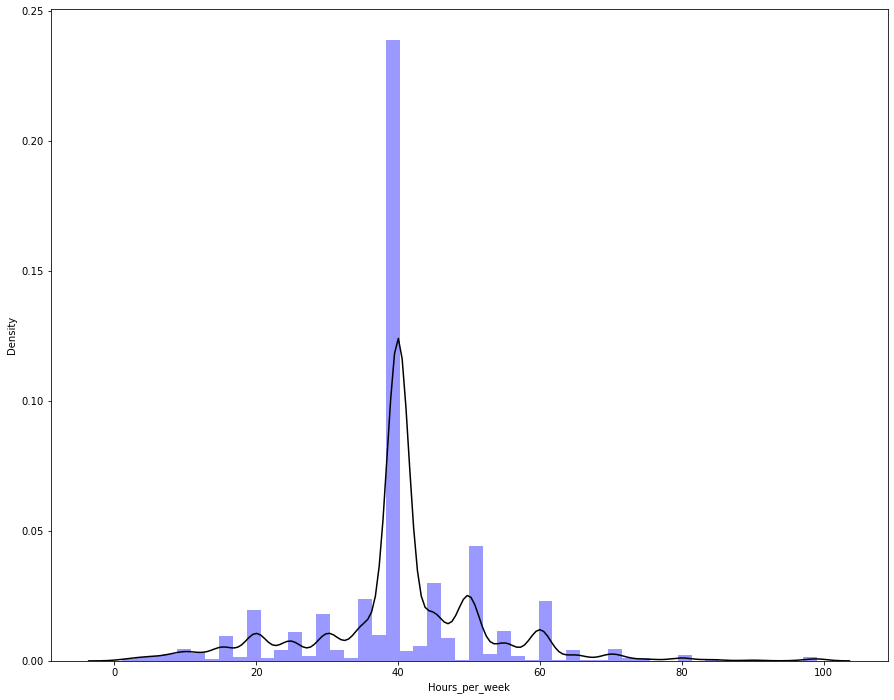

In [28]:
plt.figure(figsize=(15,12))
sns.distplot(CI_data['Hours_per_week'],color='b', kde_kws={"color": "k"})
print('Minimum',CI_data['Hours_per_week'].min())
print('Maximum',CI_data['Hours_per_week'].max())

Most of the people work 40 hours a day where there is a high chance that they belong to private sector. There are people working as low ass 1 hour a week and as high as 99 hours a week which undoubtfully might belong from the armed forces. Data shows less skewness compared to the other features in the dataframe.

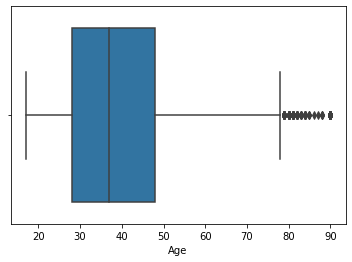

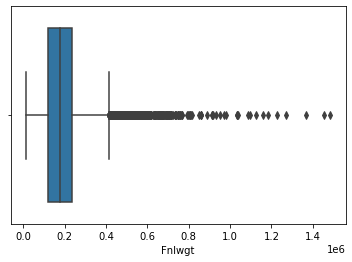

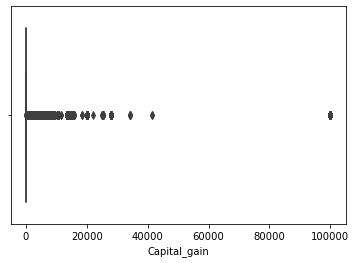

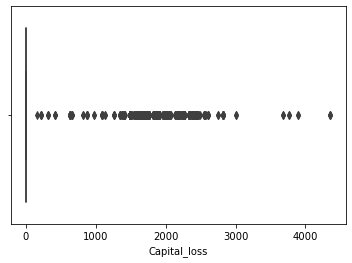

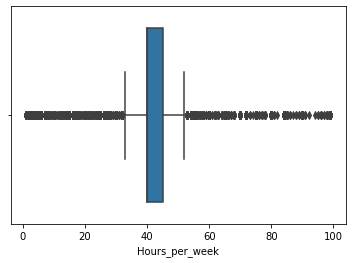

<Figure size 432x288 with 0 Axes>

In [29]:
for i in cont:
    sns.boxplot(CI_data[i])
    plt.figure()

There are outliers in all the features, while capital gain and capital loss have very vast no. of outliers.

# Bivariate Analysis

<AxesSubplot:xlabel='Income', ylabel='Workclass'>

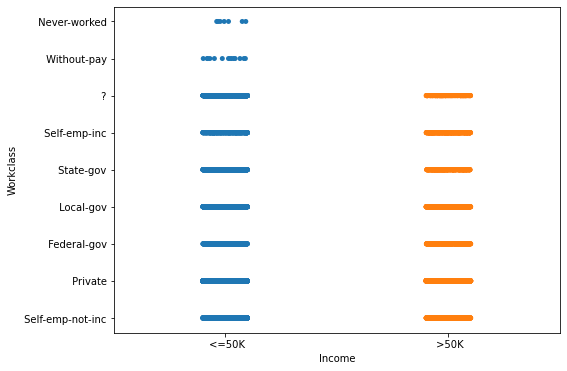

In [30]:
plt.figure(figsize=(8,6))
sns.stripplot(x='Income',y='Workclass',data=CI_data)

There are individuals belonging from every workclass who earn >50k except for never worked and without pay, and even there no. is low in the <=50k category.

<AxesSubplot:xlabel='Income', ylabel='Education'>

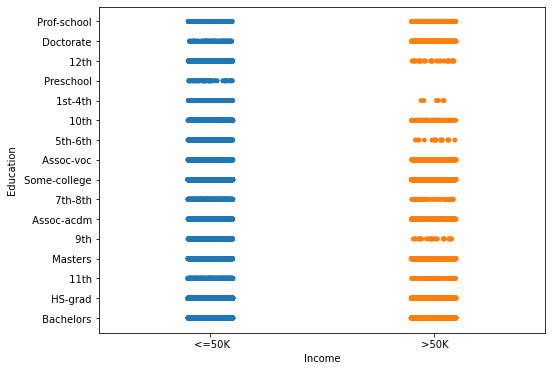

In [31]:
plt.figure(figsize=(8,6))
sns.stripplot(x='Income',y='Education',data=CI_data)

There is no individual who has done preschool and earns >50k salary while there are few who earn 50k even after going through 1st-4th and 5th-6th in the education criteria. It is also to be noticed that there are doctorates and prof who earn <=50k even with such high education.

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

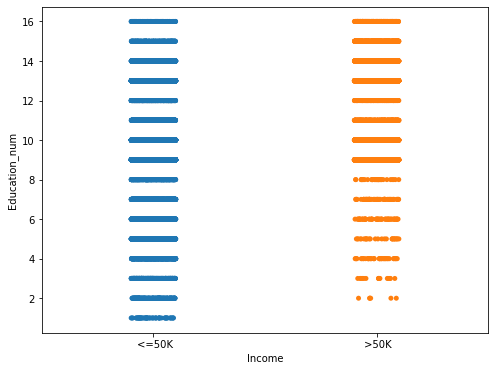

In [32]:
plt.figure(figsize=(8,6))
sns.stripplot(x='Income',y='Education_num',data=CI_data)

It is clearly seen that as the education no. increases chances of earning >50K salary also increases

<AxesSubplot:xlabel='Income', ylabel='Marital_status'>

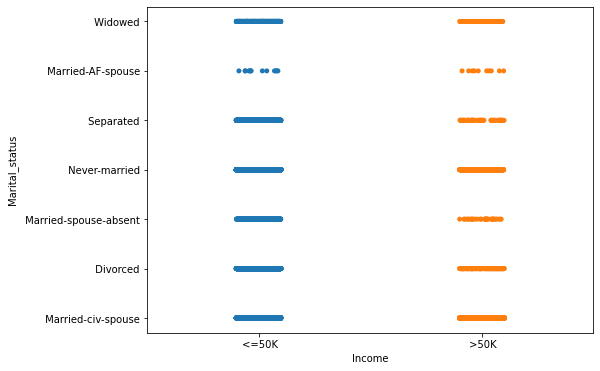

In [33]:
plt.figure(figsize=(8,6))
sns.stripplot(x='Income',y='Marital_status',data=CI_data)

There are less no. of individual who are married armed forces spouse, thats why the no. is less in both the categories while people with married spouse absent are less in >50k category income comparatively.

<AxesSubplot:xlabel='Income', ylabel='Occupation'>

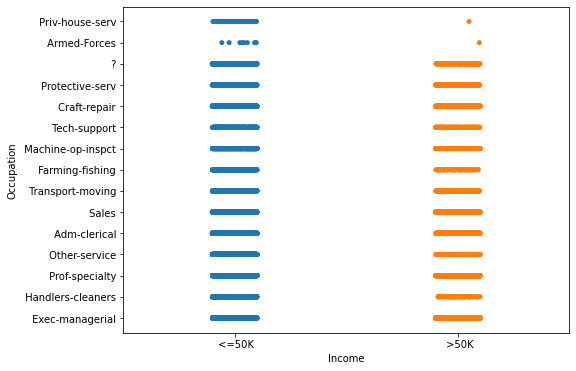

In [34]:
plt.figure(figsize=(8,6))
sns.stripplot(x='Income',y='Occupation',data=CI_data)

There are very few people with income greater than armed forces and private house service while all the other categories of people are distributed evenly in both the income categories.

<AxesSubplot:xlabel='Income', ylabel='Native_country'>

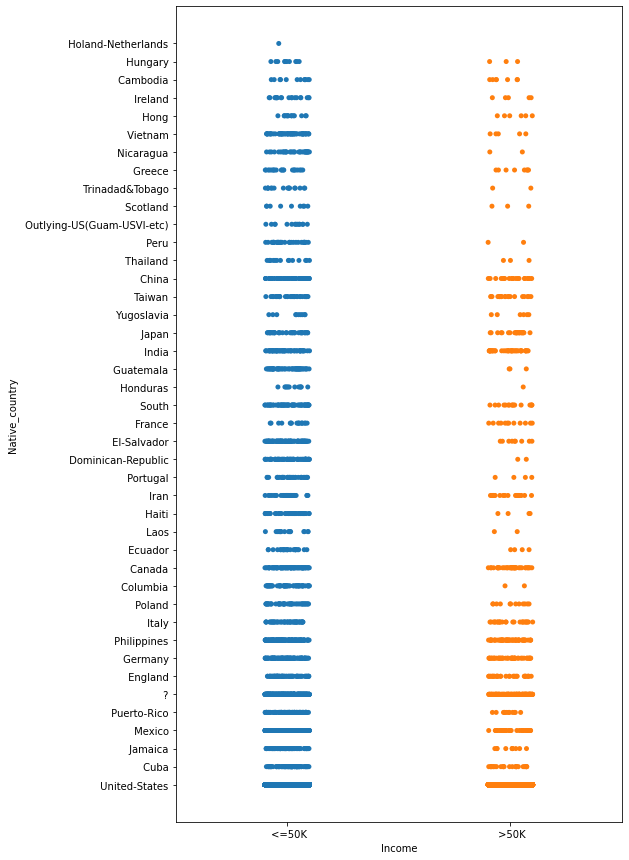

In [35]:
plt.figure(figsize=(8,15))
sns.stripplot(x='Income',y='Native_country',data=CI_data)

The grapghs shows people belonging to diff countries have less chances of earning >50k which is wrong, this is because no. of individuals belonging from other countries other than U.S are very low nut it is to be noticed that there are more people in the category <=50k than >50k.

<AxesSubplot:>

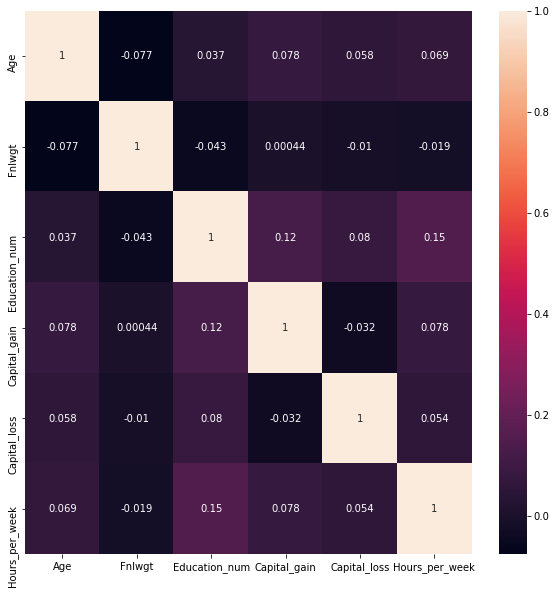

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(CI_data.corr(),annot=True)

There are only few features in the above heat map as most of them are of object type. From here we can see that the independent features don not have much correlation with each other i.e. no multicollinearity.

# Feature Engineering

## Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
l=LabelEncoder()
o=OrdinalEncoder()

In [38]:
#We use ordinal encoder to Encode Independent features
for i in CI_data.columns:
    if CI_data[i].dtypes=='O' and i!='Income':
        CI_data[i]=o.fit_transform(CI_data[i].values.reshape(-1,1))

In [39]:
#We use label encoder to encode label 
CI_data['Income']=l.fit_transform(CI_data['Income'])

### Removing Outliers

In [40]:
from scipy.stats import zscore

In [41]:
#Method to find optimum threshold
def threshold():
    for i in np.arange(3,5,0.2):
        data=CI_data.copy()
        data=data[(z<i).all(axis=1)]
        loss=(CI_data.shape[0]-data.shape[0])/CI_data.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

In [42]:
z=np.abs(zscore(CI_data))
threshold()

With threshold 3.0 data loss is 15.8%
With threshold 3.2 data loss is 12.17%
With threshold 3.4 data loss is 11.1%
With threshold 3.6 data loss is 10.2%
With threshold 3.8 data loss is 9.0%
With threshold 4.0 data loss is 8.44%
With threshold 4.2 data loss is 7.46%
With threshold 4.4 data loss is 6.08%
With threshold 4.6 data loss is 4.37%
With threshold 4.8 data loss is 1.55%


From above we choose threhold as 4.2 as data is precious and we cannot afford to lose more than 8% of data.

In [43]:
CI_data=CI_data[(z<4.2).all(axis=1)]

### Removing Skewness

In [44]:
#using Power transformer to remove skewness
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [45]:
for i in cont:
    if np.abs(CI_data[i].skew())>0.5:
        CI_data[i]=pt.fit_transform(CI_data[i].values.reshape(-1,1))

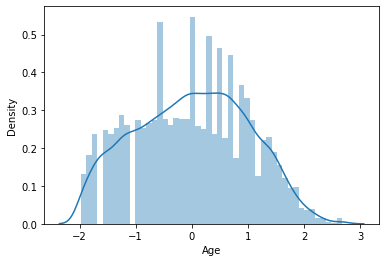

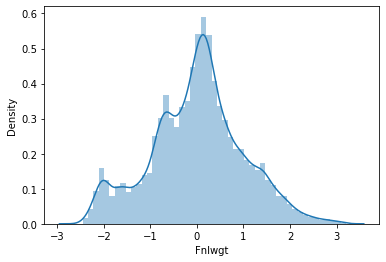

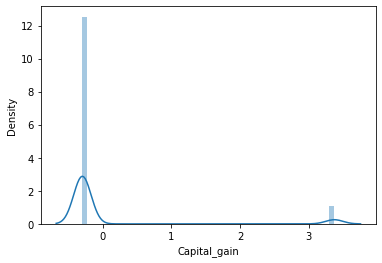

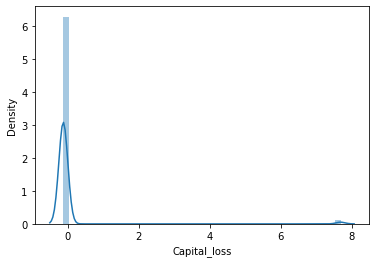

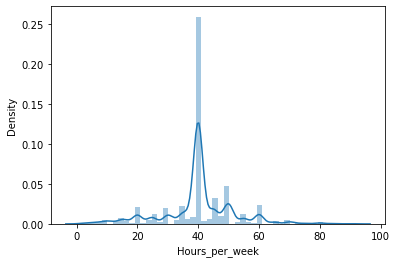

<Figure size 432x288 with 0 Axes>

In [46]:
for i in cont:
    sns.distplot(CI_data[i])
    plt.figure()

A lot of skewness has been resuced but we cannot remove skewness more than this.

In [47]:
#Separating dependent and independent features.
x=CI_data.copy()
x.drop('Income',axis=1,inplace=True)
y=CI_data['Income']

#### Handling Imbalanced Data

In [48]:
#Oversampling using Smote
from imblearn.over_sampling import SMOTE
over=SMOTE()

In [49]:
x,y=over.fit_resample(x,y)

0    23423
1    23423
Name: Income, dtype: int64

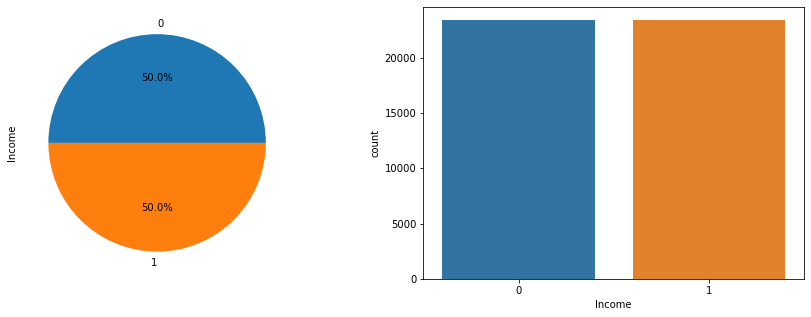

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(y)
y.value_counts()

Data is balanced now, both the category of income have 50% data each.

### Scaling the data

In [51]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [52]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

# Modelling Phase

In [53]:
#We import Classification Models
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [54]:
#Function to find the best random state
def randomstate(x,y):
    maxx=0
    model=LogisticRegression()
    for i in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=i)
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        accu=accuracy_score(p,ytest)
        if accu>maxx:
            maxx=accu
            j=i
    return j

In [55]:
#To evakuate performances of all the models
def performance(p,ytest,m,xtest,s):
    print('------------------------------------',m,'------------------------------------')
    print('Accuracy',np.round(accuracy_score(p,ytest),4))
    print('----------------------------------------------------------')
    print('Mean of Cross Validation Score',np.round(s.mean(),4))
    print('----------------------------------------------------------')
    print('AUC_ROC Score',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
    print('----------------------------------------------------------')
    print('Confusion Matrix')
    print(confusion_matrix(p,ytest))
    print('----------------------------------------------------------')
    print('Classification Report')
    print(classification_report(p,ytest))

In [56]:
#Creating a list of models which will be created one by one
models=[GaussianNB(),KNeighborsClassifier(),LogisticRegression(),DecisionTreeClassifier(),
        RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(verbosity=0)]

In [57]:
#Creates and trains model from the models list
def createmodel(x,y):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))
    for i in models:
        model=i
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,x,y,cv=10)
        performance(p,ytest,model,xtest,score) 

In [58]:
createmodel(x,y)

------------------------------------ GaussianNB() ------------------------------------
Accuracy 0.7781
----------------------------------------------------------
Mean of Cross Validation Score 0.7745
----------------------------------------------------------
AUC_ROC Score 0.8566
----------------------------------------------------------
Confusion Matrix
[[4387 1140]
 [1459 4726]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      5527
           1       0.81      0.76      0.78      6185

    accuracy                           0.78     11712
   macro avg       0.78      0.78      0.78     11712
weighted avg       0.78      0.78      0.78     11712

------------------------------------ KNeighborsClassifier() ------------------------------------
Accuracy 0.8531
----------------------------------------------------------
Mean of Cross Validation Score 0.8576

Random Forest, Gradient Boost, Xtreme Gradient Boost give us the best performance, so we further try hyperparameter tuning on them

# Hyperparameter Tuning

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))

#### Random Forest

In [61]:
params={'n_estimators':[100,300,500],
            'criterion':['gini','entropty'],
            'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
           'max_features':['int','float','auto','log2']}

In [62]:
g=GridSearchCV(RandomForestClassifier(),params,cv=10)

In [67]:
g.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropty'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['int', 'float', 'auto', 'log2'],
                         'n_estimators': [100, 300, 500]})

In [64]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 300}
RandomForestClassifier(n_estimators=300)
0.8958275474410764


In [65]:
m=RandomForestClassifier(max_features='log2', n_estimators=500)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)
performance(p,ytest,m,xtest,score)

------------------------------------ RandomForestClassifier(max_features='log2', n_estimators=500) ------------------------------------
Accuracy 0.8998
----------------------------------------------------------
Mean of Cross Validation Score 0.9028
----------------------------------------------------------
AUC_ROC Score 0.9623
----------------------------------------------------------
Confusion Matrix
[[5143  471]
 [ 703 5395]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      5614
           1       0.92      0.88      0.90      6098

    accuracy                           0.90     11712
   macro avg       0.90      0.90      0.90     11712
weighted avg       0.90      0.90      0.90     11712



We choose random forest as our final model because it gives the highest cross validation score as well as difference between its accuracy score and cross validation score is minimum.

## Finalizing the model

In [68]:
model=RandomForestClassifier(max_features='log2', n_estimators=500)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
score=cross_val_score(model,x,y,cv=10)

## Evaluation Metrics

In [69]:
performance(p,ytest,model,xtest,score)

------------------------------------ RandomForestClassifier(max_features='log2', n_estimators=500) ------------------------------------
Accuracy 0.8994
----------------------------------------------------------
Mean of Cross Validation Score 0.9026
----------------------------------------------------------
AUC_ROC Score 0.9622
----------------------------------------------------------
Confusion Matrix
[[5143  475]
 [ 703 5391]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      5618
           1       0.92      0.88      0.90      6094

    accuracy                           0.90     11712
   macro avg       0.90      0.90      0.90     11712
weighted avg       0.90      0.90      0.90     11712



In [70]:
fpred=pd.Series(model.predict_proba(xtest)[:,1])
fpr,tpr,threshold=roc_curve(ytest,fpred)

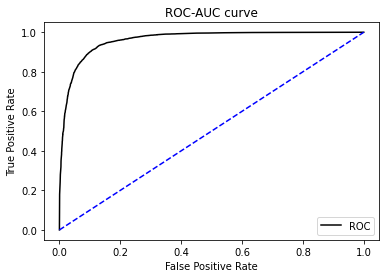

In [71]:
plt.plot(fpr,tpr,color='k',label='ROC')
plt.plot([0,1],[0,1],color='b',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve')
plt.legend()

# Saving the model

In [72]:
import joblib
joblib.dump(model,'census_income.obj')

['census_income.obj']